# The Brief: 

The NBA draft is an annual event in which teams select players from their American colleges as well as international professional leagues to join their rosters. Moving to the NBA league is a big deal for any basketball player. 

Sport commentators and fans are very excited to follow the careers of college players and guess who will be drafted by an NBA team.

You are tasked to build a model that will predict if a college basketball player will be drafted to join the NBA league based on his statistics for the current season.

The metric used to assess model performance is AUROC (Area Under ROC).


# 1. Data collection

In [11]:
#[1.1] import libraries
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from joblib import dump
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
#[1-2]Load the data into a DataFrame
df = pd.read_csv('../data/raw/train.csv', dtype={'Column26': str}, low_memory=False)
df_test = pd.read_csv('../data/raw/test.csv', dtype={'Column26': str}, low_memory=False)



# 2.Explore dataset

In [13]:
#[2-1] Display the 5 first rows of df
df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [14]:
#[2-2] Display the dimentions (shape) of df
df.shape

(56091, 64)

In [15]:
# [2-3] Display the summary (info) of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [16]:
# [2-4] Display the descriptive statictics of df
df.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,...,56047.000000,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091.000000
mean,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,10.848740,20.337819,...,-2.083375,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,0.009556
std,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,9.356001,12.226129,...,6.190166,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,0.097287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,4.600000,14.800000,...,-4.426515,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,0.000000
50%,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,9.100000,19.100000,...,-1.580380,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,0.000000
75%,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,15.100000,24.500000,...,0.992335,1.066415,1.111100,2.758600,3.833300,1.533300,0.793100,0.366700,9.069000,0.000000
max,41.000000,98.000000,834.000000,50.000000,150.000000,150.000000,1576.600000,1385.000000,100.000000,100.000000,...,225.485000,78.985500,5.933300,11.545500,14.533300,10.000000,4.000000,5.258100,30.090900,1.000000


check for imbalance class

In [17]:
# [2-5] target count
df['drafted'].value_counts()

0.0    55555
1.0      536
Name: drafted, dtype: int64

We have imbalanced data

<Axes: ylabel='drafted'>

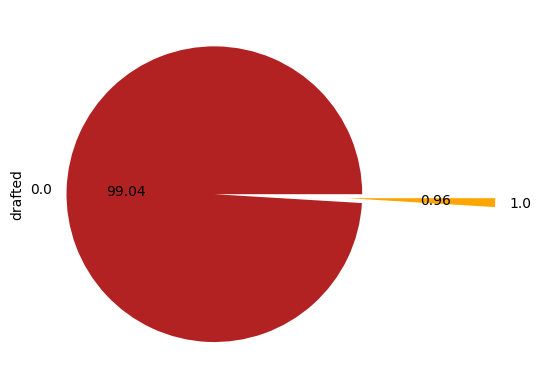

In [18]:
#[2-6] pie chart of target value
y = df['drafted']
colors = ['firebrick', 'orange']
myexplode=[0,0.9]
y.value_counts().plot.pie(explode= myexplode,colors=colors, autopct='%.2f')

# 3.Data Cleaning

In [19]:
#[3.1] Create a copy of df and save it into a variable called df_cleaned
df_cleaned=df.copy()
df_test_cleaned=df_test.copy()

<Axes: >

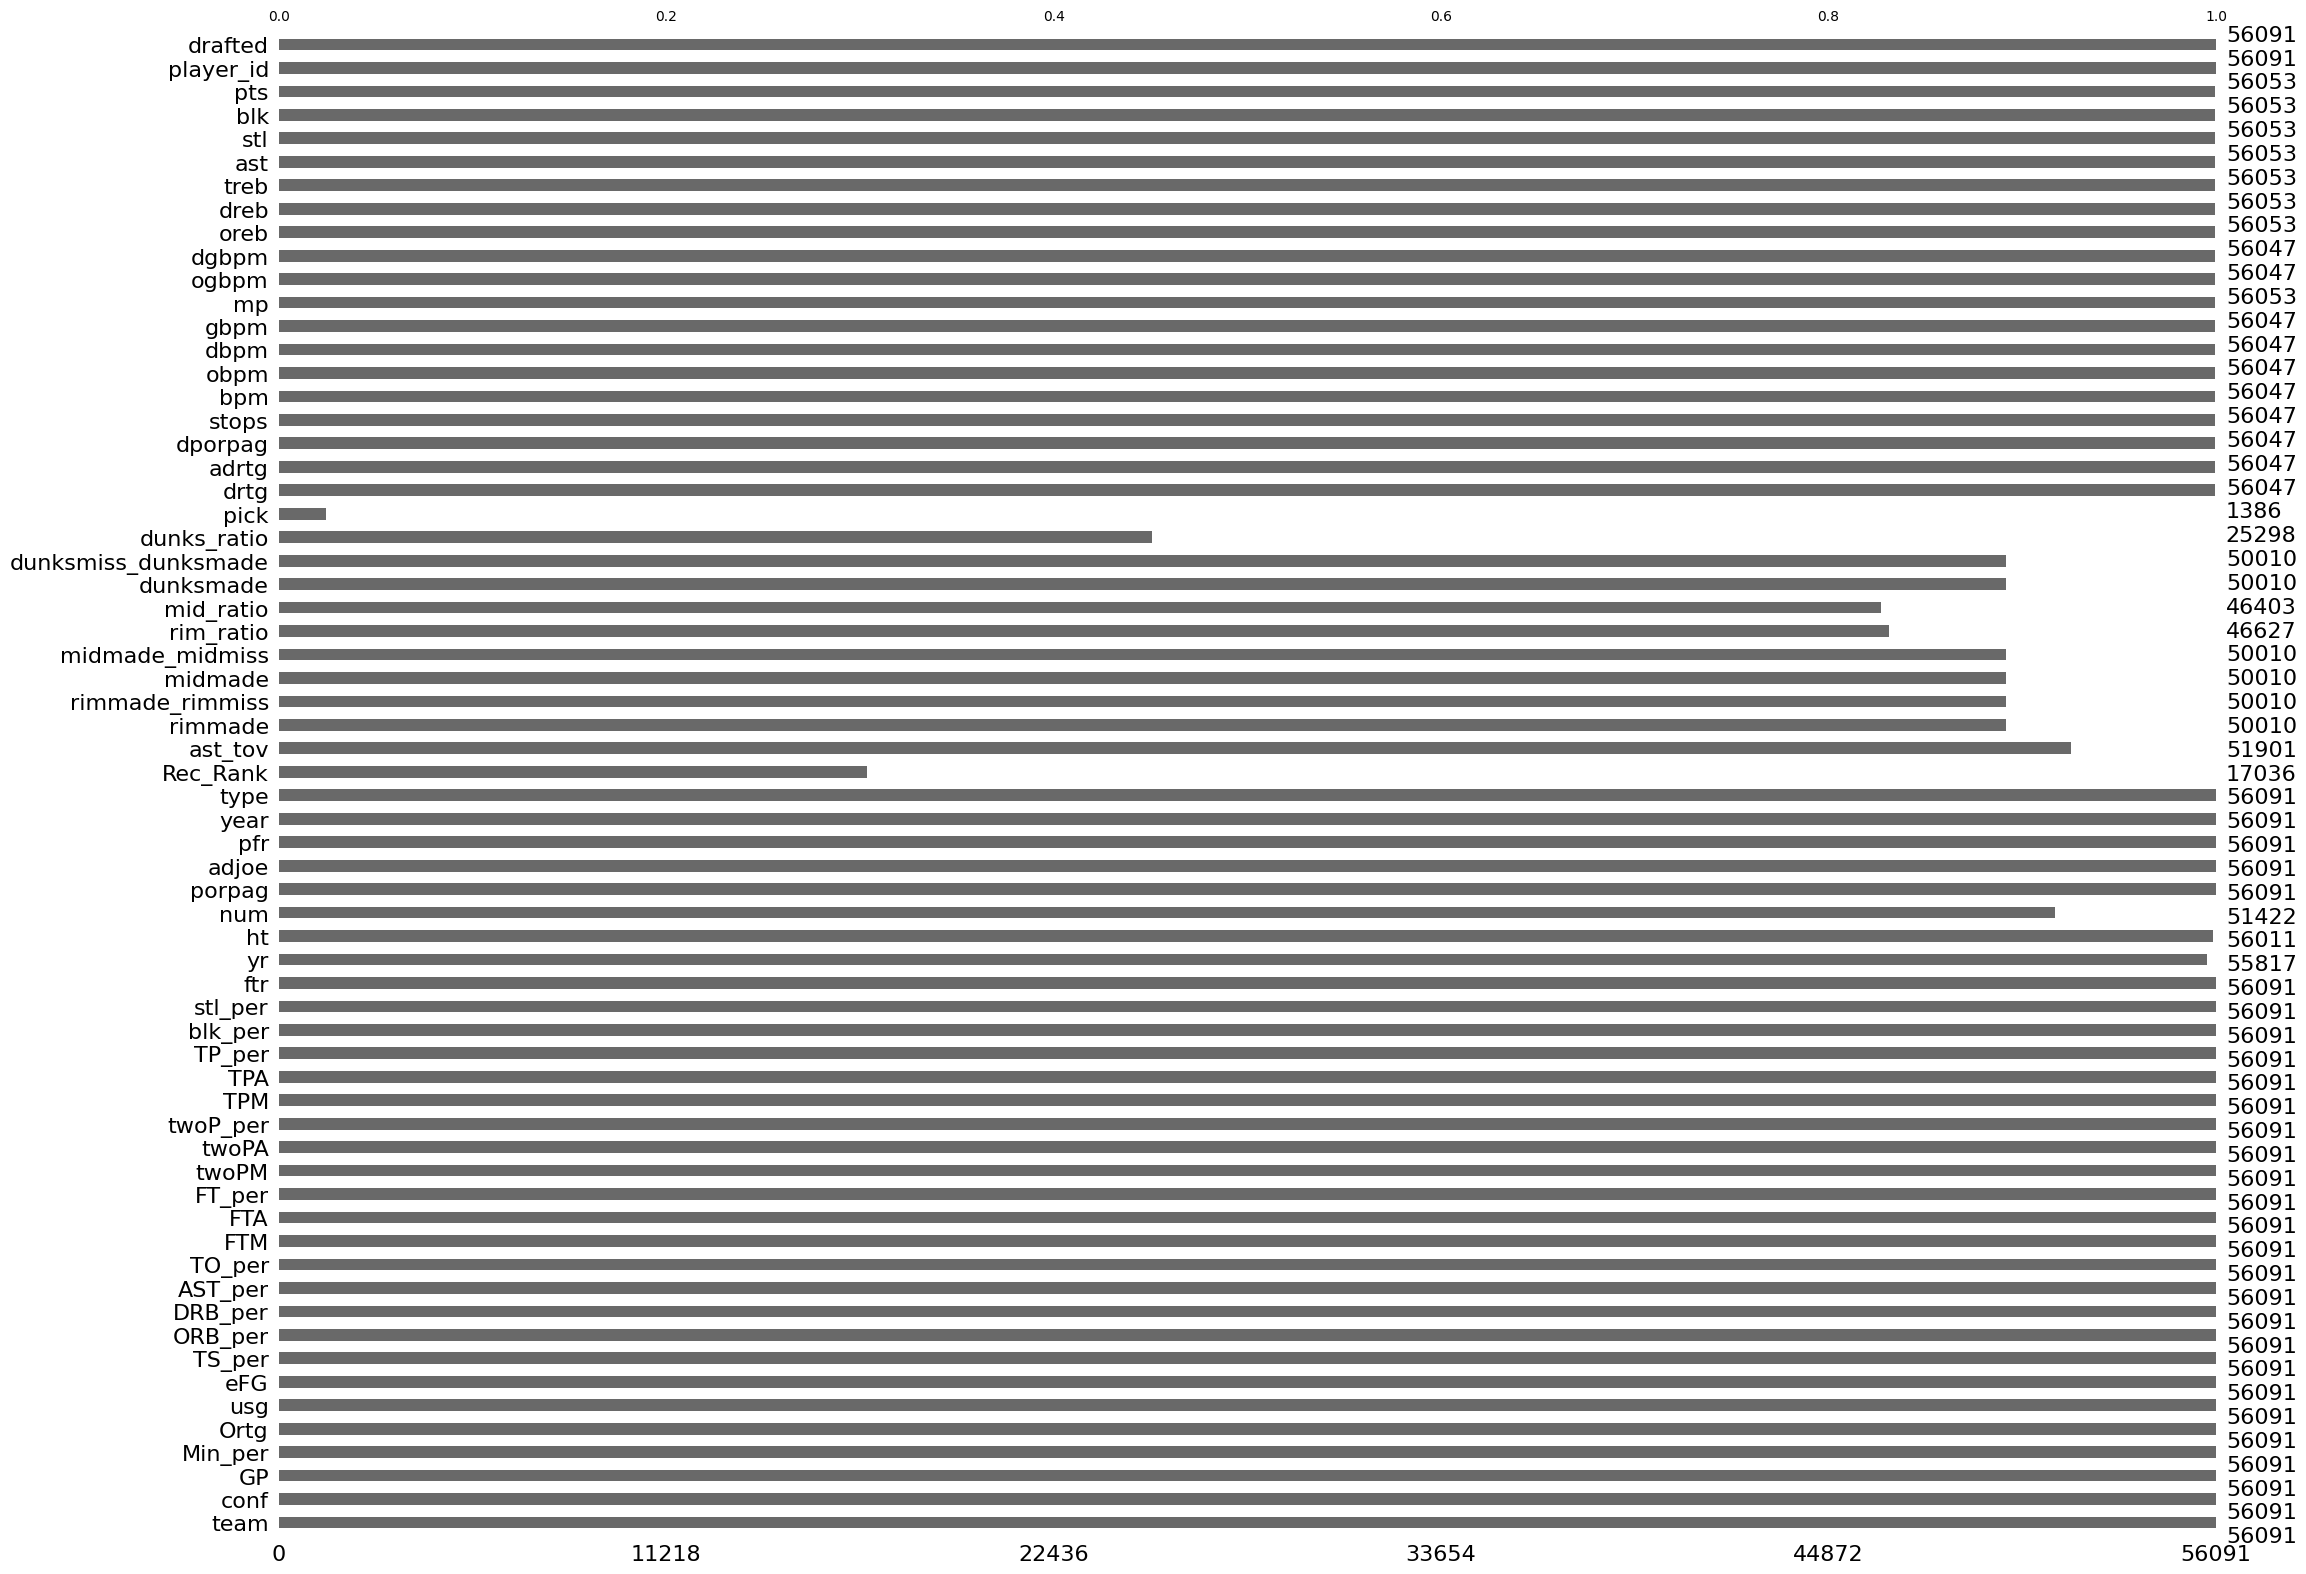

In [20]:
# [3-2] finding missing values
msno.bar(df_cleaned)

In [21]:
#[3-3] Check for missing values in each column
columns_with_missing = df_cleaned.columns[df_cleaned.isna().any()]

# Print the names of columns with missing values
print("Columns with missing values:", columns_with_missing)


Columns with missing values: Index(['yr', 'ht', 'num', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
       'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'],
      dtype='object')


In [22]:
#[3-4]Count the number of columns with missing values
num_columns_with_missing = df_cleaned.isna().any().sum()

# Print the result
print("Number of columns with missing values:", num_columns_with_missing)

Number of columns with missing values: 33


In [23]:
#[3-5] Iterate through each column and fill missing values with the mode of that column
for column in df_cleaned.columns:
    mode_value = df_cleaned[column].mode()[0]
    df_cleaned[column].fillna(mode_value, inplace=True)



In [24]:
#[3-6] Iterate through each column and fill missing values with the mode of that column(test)
for column in df_test_cleaned.columns:
    mode_value = df_test_cleaned[column].mode()[0]
    df_test_cleaned[column].fillna(mode_value, inplace=True)



In [25]:
#[3-7] Dropping columns with high missing values 
df_cleaned.drop(columns=['pick','dunks_ratio','dunksmiss_dunksmade','dunksmade','Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
       'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio','num','player_id'],axis=1,inplace=True)

df_test_cleaned.drop(columns=['pick','dunks_ratio','dunksmiss_dunksmade','dunksmade','Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
       'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio','num'],axis=1,inplace=True)

Almost half of the columns have missing values, so we only get rid of those with large missing values to prevent losing valuable insight.

In [26]:
#[3-8]Check for duplicates
has_duplicates = df_cleaned.duplicated().any()

# Print the result
if has_duplicates:
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


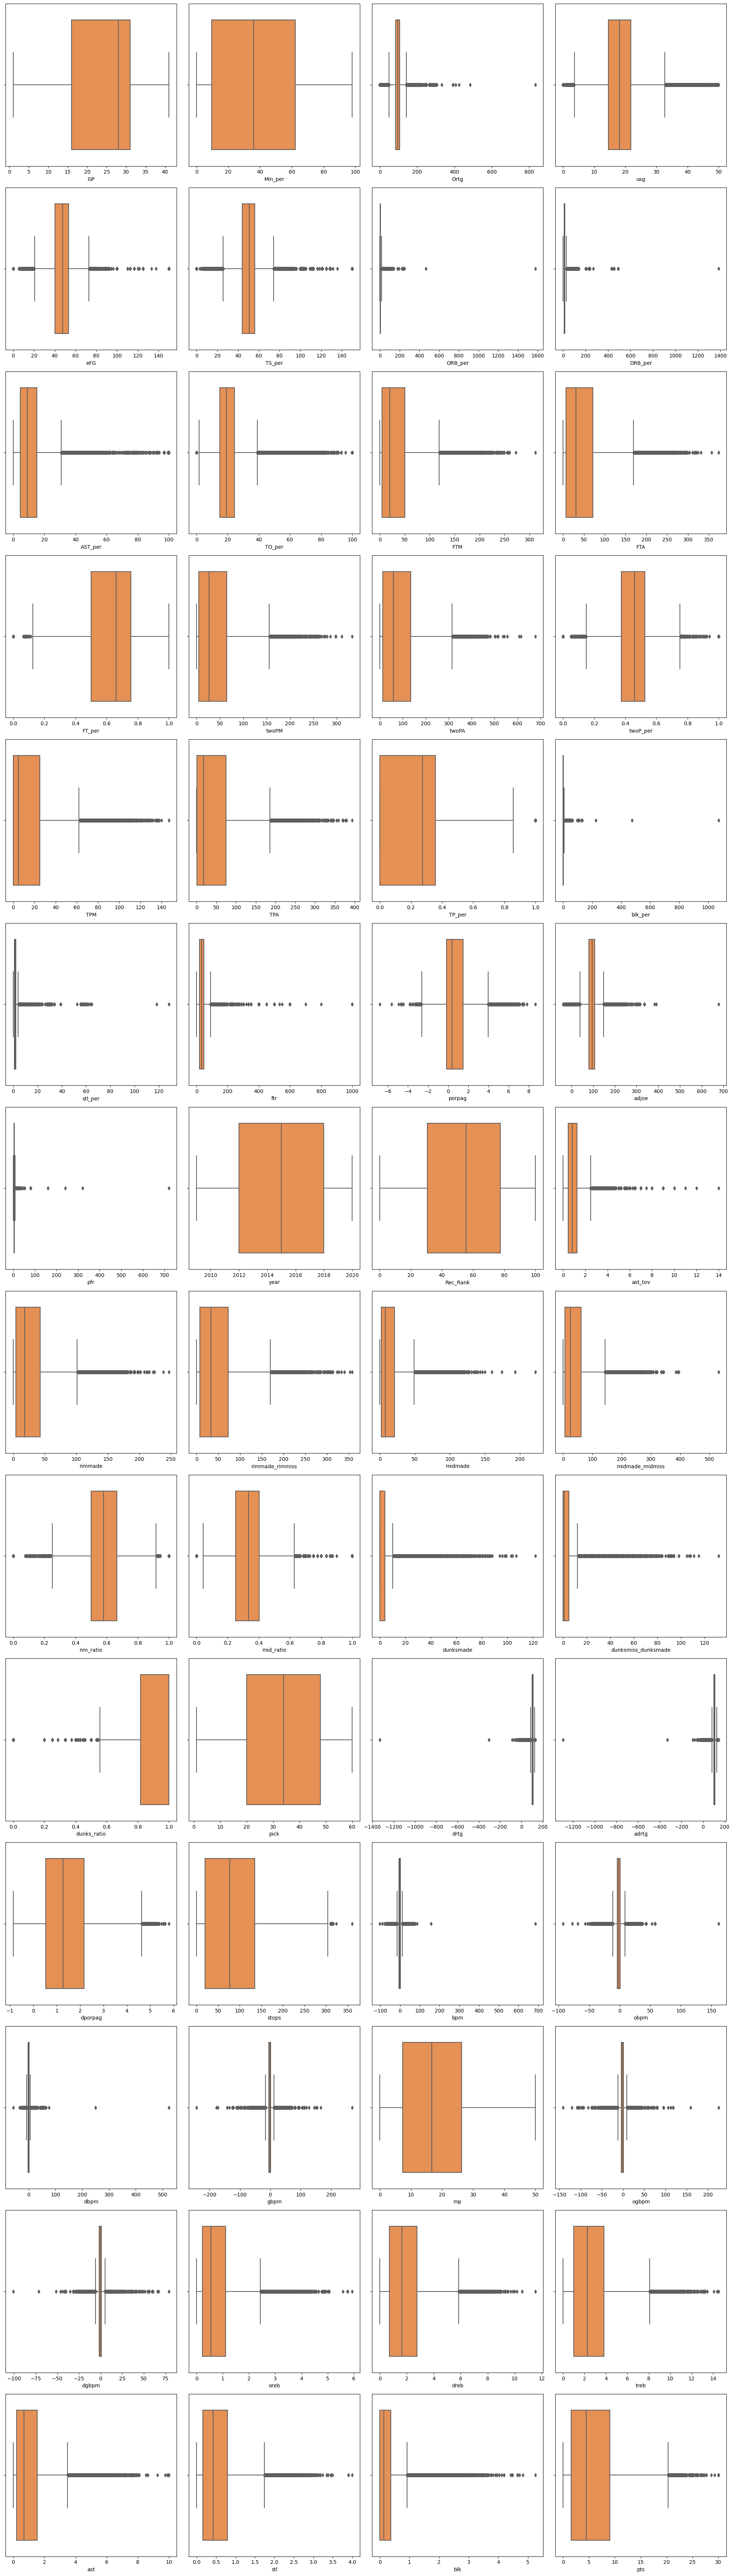

In [27]:
#[3-9] Box plot for identifying outliers
# Select the numeric columns in the cleaned training data, excluding "drafted"
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove("drafted")  # Remove the "drafted" column from the list

# Create a grid of subplots for each numeric column
num_rows = (len(num_cols) - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, num_rows * 5))
axes = [ax for axes_row in axes for ax in axes_row]

# Plot boxplots for each numeric column (excluding "drafted")
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], palette='Oranges')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

As we suspected from the scatter plot, there are some outliers in these columns : 
'dgbpm', 'oreb', 'dreb', 'treb', 'ogbpm', 'gbpm', 'dbpm', 'obpm', 'adrtg', 'drtg', 'dunksmiss_dunksmade', 'unksmiss', 'mid_ratio', 'rim_ratio', 'midmade_midmiss', 'midmade', 'rimmade_rimmiss','rimmade', 'ast_tov', 'pfr', 'adjoe', 'porpag', 'ftr', 'stl_per', 'blk_per', 'Tp_per', 'DRB_per', 'ORB_per', 'eFG', 'Ortg'



In [28]:
#[3-10] Removing outliers
columns_to_exclude = ['drafted']

# Loop through numeric columns and remove outliers for df_test_cleaned
for i in df_test_cleaned.select_dtypes(include=['float64', 'int64']):
    if i in ('TPA','TPF','FTM','FTA','FT_per','two_PM','two_PA','bpm','stops','TP_per','stl','blk','dgbpm', 'oreb', 'dreb', 'treb', 'ogbpm', 'gbpm', 'dbpm', 'obpm', 'adrtg', 'drtg', 'dunksmiss_dunksmade', 'unksmiss', 'mid_ratio', 'rim_ratio', 'midmade_midmiss', 'midmade', 'rimmade_rimmiss','rimmade', 'ast_tov', 'pfr', 'adjoe', 'porpag', 'ftr', 'stl_per', 'blk_per', 'Tp_per', 'DRB_per', 'ORB_per', 'eFG', 'Ortg') and i not in columns_to_exclude:
        q1 = df_test_cleaned[i].quantile(0.25)                 
        q3 = df_test_cleaned[i].quantile(0.75)
        iqr = q3 - q1
        whisker_width = 1.5
        lower_whisker = q1 - whisker_width * iqr
        upper_whisker = q3 + whisker_width * iqr
        outlier_df = df_test_cleaned[(df_test_cleaned[i] < lower_whisker) | (df_test_cleaned[i] > upper_whisker)]
        df_test_cleaned.loc[df_test_cleaned[i] < lower_whisker, i] = lower_whisker
        df_test_cleaned.loc[df_test_cleaned[i] > upper_whisker, i] = upper_whisker


In [29]:
#[3-10] Removing outliers(test set)
columns_to_exclude = ['drafted']

# Loop through numeric columns and remove outliers for df_cleaned
for i in df_cleaned.select_dtypes(include=['float64', 'int64']):
    if i in ('TPA','TPF','FTM','FTA','FT_per','two_PM','two_PA','bpm','stops','TP_per','stl','blk','dgbpm', 'oreb', 'dreb', 'treb', 'ogbpm', 'gbpm', 'dbpm', 'obpm', 'adrtg', 'drtg', 'dunksmiss_dunksmade', 'unksmiss', 'mid_ratio', 'rim_ratio', 'midmade_midmiss', 'midmade', 'rimmade_rimmiss','rimmade', 'ast_tov', 'pfr', 'adjoe', 'porpag', 'ftr', 'stl_per', 'blk_per', 'Tp_per', 'DRB_per', 'ORB_per', 'eFG', 'Ortg') and i not in columns_to_exclude:
        q1 = df_cleaned[i].quantile(0.25)                 
        q3 = df_cleaned[i].quantile(0.75)
        iqr = q3 - q1
        whisker_width = 1.5
        lower_whisker = q1 - whisker_width * iqr
        upper_whisker = q3 + whisker_width * iqr
        outlier_df = df_cleaned[(df_cleaned[i] < lower_whisker) | (df_cleaned[i] > upper_whisker)]
        df_cleaned.loc[df_cleaned[i] < lower_whisker, i] = lower_whisker
        df_cleaned.loc[df_cleaned[i] > upper_whisker, i] = upper_whisker


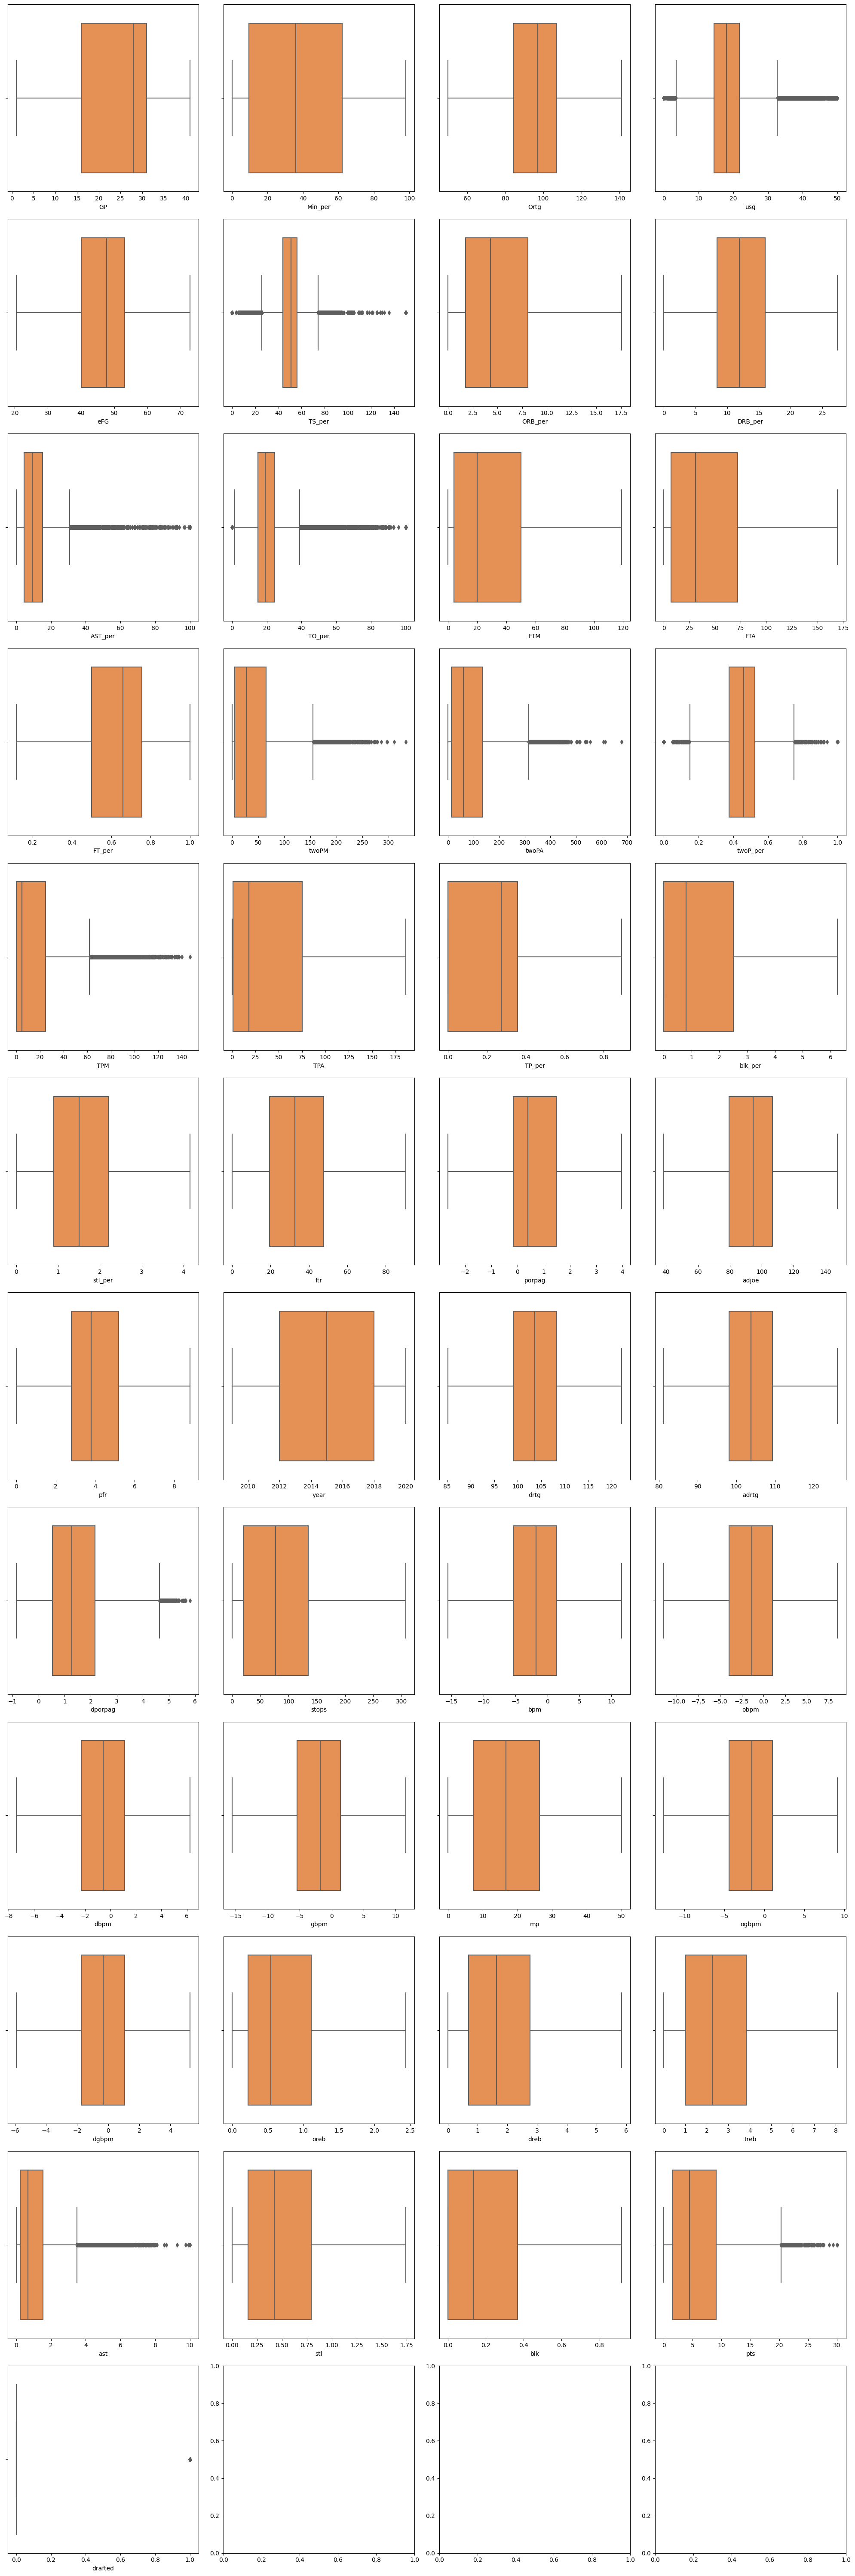

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numeric columns in the cleaned training data
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots for each numeric column
num_rows = (len(num_cols) - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, num_rows * 5))
axes = [ax for axes_row in axes for ax in axes_row]

# Plot boxplots for each numeric column
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_cleaned, x=col, ax=axes[i], palette='Oranges')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [31]:
#[3-11]check the shape
train_shape=df_cleaned.shape
test_shape=df_test_cleaned.shape
print("train shape =", train_shape)
print("test shape=",test_shape)

train shape = (56091, 50)
test shape= (4970, 50)


In [32]:
#[3-12] Create 2 lists named `num_cols` and `cat_cols` containing respectively the names of numerical and categotical columns
num_cols = list(df_cleaned.select_dtypes('number').columns)
cat_cols = list(set(df_cleaned.columns) - set(num_cols))

In [33]:
#[3-13] Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [34]:
#[3-14] Fit and apply the OneHotEncoder on df_cleaned and save the result in features
features = ohe.fit_transform(df_cleaned[cat_cols])

In [35]:
#[3-15]Convert `features` into a dataframe
features = pd.DataFrame(features, columns=ohe.get_feature_names_out())

In [36]:
#[3-16]Fit and apply the scaling on `df` and add the results into `features`
scaler = StandardScaler()
features[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [37]:
dump(ohe, '../models/ohe.joblib')
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

# 4.Categorical Variable Analysis

In [38]:
#[4-1] idenfying categorical columns
totalcat=df_cleaned.select_dtypes(include=['object'])
totalcat.head()

,team,conf,yr,ht,type
0,South Alabama,SB,So,2-Jun,all
1,Utah St.,WAC,So,4-Jun,all
2,South Florida,BE,Sr,4-Jun,all
3,Pepperdine,WCC,Sr,4-Jun,all
4,Pacific,BW,Sr,8-Jun,all


In [39]:
#[4-2] unique values of conf
unique_conf_values = df_cleaned['conf'].nunique()

# Print the number of unique values
print("Number of unique values in 'conf' column:", unique_conf_values)

Number of unique values in 'conf' column: 36


There is 36 unique values in conf column so we use ohe

In [40]:
#[4-3] unique values of type
unique_type = df_cleaned['type'].unique()
print("Unique values of 'type' column:", unique_type)

Unique values of 'type' column: ['all']


type column only has one value so we get rid of it.

In [41]:
#[4-5]Dropping "type" column
df_cleaned.drop(columns=["type"],axis=1,inplace=True)
df_test_cleaned.drop(columns=["type"],axis=1,inplace=True)

In [42]:
#[4-6] unique values of team
unique_team = df_cleaned['team'].unique()
print("Unique values of 'team' column:", unique_team)


Unique values of 'team' column: ['South Alabama' 'Utah St.' 'South Florida' 'Pepperdine' 'Pacific'
 'Butler' 'Longwood' 'Fordham' 'Wagner' 'Pittsburgh' 'Connecticut'
 'North Carolina St.' 'Chicago St.' 'LSU' 'Boston University' 'Detroit'
 'Albany' 'Manhattan' 'Navy' "Saint Mary's" 'Alabama A&M' 'Hofstra'
 'James Madison' 'Missouri St.' 'Alabama' 'Boston College' 'Drexel'
 'Binghamton' 'Bowling Green' 'Maryland' 'Colorado' 'Southern Miss'
 'Old Dominion' 'Cal St. Fullerton' 'Oregon St.' 'St. Francis PA'
 'Southern Illinois' 'Loyola Chicago' 'Indiana' 'Hawaii' 'Elon'
 'Holy Cross' 'Vanderbilt' 'VCU' 'Monmouth' 'North Carolina A&T' 'Lamar'
 'Howard' 'Furman' 'George Mason' 'Louisiana Lafayette' 'Marquette'
 'Central Connecticut' 'Providence' 'Princeton' 'Virginia' 'Georgia St.'
 'UAB' 'Florida St.' 'Duke' 'Purdue' 'New Orleans' 'Notre Dame' 'Wofford'
 'California' 'Arizona' 'UTEP' 'Centenary' 'Appalachian St.' 'Brown'
 'Illinois Chicago' 'Bucknell' 'Long Beach St.' 'Richmond' 'Seton Hall'

In [43]:
# [4-7]Calculate the number of unique values in the 'team' column
unique_team_values = df_cleaned['team'].nunique()

# Print the number of unique values
print("Number of unique values in 'team' column:", unique_team_values)

Number of unique values in 'team' column: 358


We will perform ohe for this column

In [44]:
#[4-8] unique values of yr
unique_years = df_cleaned['yr'].unique()
print("Unique values of 'yr' column:", unique_years)


Unique values of 'yr' column: ['So' 'Sr' 'Jr' 'Fr' '0' '57.1' '42.9' 'None']


In [45]:
#[4-9] unique values of height
unique_ht = df_cleaned['ht'].unique()
print("Unique values of 'ht' column:", unique_ht)

Unique values of 'ht' column: ['2-Jun' '4-Jun' '8-Jun' '1-Jun' '5-Jun' 'Jun-00' '6-Jun' '9-Jun' '3-Jun'
 '11-Jun' '7-Jun' '10-May' '10-Jun' '11-May' '9-May' 'Jul-00' '7-May'
 '5-Jul' '8-May' '6-May' '2-Jul' '1-Jul' '-' '3-May' '3-Jul' 'Apr-00'
 '5-May' '4-Jul' 'So' 'Jr' 'Fr' "6'4" 'None' '4-May' '0' '1-May' '6-Jul'
 '5-Apr' '2-May']


In [46]:
#[4-10]Dropping "ht" column
df_cleaned.drop(columns=["ht"],axis=1,inplace=True)
df_test_cleaned.drop(columns=["ht"],axis=1,inplace=True)

The data in 'ht' column supposed to show the student height but instead of height it shows date and that doesn't make sense so we get rid of this column as well.
ps: This column might have some important info because the height is important for basketball players( we will get back to it in future experiments)

In [47]:
#[4-11] unique values of yr
unique_years = df_cleaned['yr'].unique()
print("Unique values of 'yr' column:", unique_years)


Unique values of 'yr' column: ['So' 'Sr' 'Jr' 'Fr' '0' '57.1' '42.9' 'None']


In [48]:
#[4-11] unique values of yr (test set)
unique_years = df_test_cleaned['yr'].unique()
print("Unique values of 'yr' column:", unique_years)


Unique values of 'yr' column: ['Sr' 'Jr' 'So' 'Fr' 'None']


In [49]:
#[4-12] only keeping values that make sense


def replace_values_in_column(df, column_name, values_to_replace, replacement='others'):
    df[column_name] = df[column_name].apply(lambda x: x if x in values_to_replace else replacement)
    return df

values_to_replace = ['So', 'Sr', 'Jr', 'Fr']
df_cleaned = replace_values_in_column(df_cleaned, 'yr', values_to_replace)

values_to_replace = ['So', 'Sr', 'Jr', 'Fr']
df_test_cleaned = replace_values_in_column(df_test_cleaned, 'yr', values_to_replace)


In [51]:
#save the custom func
dump(replace_values_in_column, '../models/replace_values_func.py')

['../models/replace_values_func.py']

In [41]:
unique_years = df_test_cleaned['yr'].unique()
print("Unique values of 'yr' column:", unique_years)

Unique values of 'yr' column: ['Sr' 'Jr' 'So' 'Fr' 'others']


In [42]:
#[4-13]OneHoteEncoding 
df_cleaned = pd.get_dummies(df_cleaned, columns=['yr'], drop_first=True)

# Convert only the one-hot encoded columns to integer (0 and 1)
ohe_columns = [col for col in df_cleaned.columns if col.startswith('yr_')]
df_cleaned[ohe_columns] = df_cleaned[ohe_columns].astype(int)

In [43]:
df_test_cleaned = pd.get_dummies(df_test_cleaned, columns=['yr'], drop_first=True)

# Convert only the one-hot encoded columns to integer (0 and 1)
ohe_columns = [col for col in df_test_cleaned.columns if col.startswith('yr_')]
df_test_cleaned[ohe_columns] = df_test_cleaned[ohe_columns].astype(int)

In [44]:
#[4-14]Display the summary (info) of df_cleaned
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team       56091 non-null  object 
 1   conf       56091 non-null  object 
 2   GP         56091 non-null  int64  
 3   Min_per    56091 non-null  float64
 4   Ortg       56091 non-null  float64
 5   usg        56091 non-null  float64
 6   eFG        56091 non-null  float64
 7   TS_per     56091 non-null  float64
 8   ORB_per    56091 non-null  float64
 9   DRB_per    56091 non-null  float64
 10  AST_per    56091 non-null  float64
 11  TO_per     56091 non-null  float64
 12  FTM        56091 non-null  int64  
 13  FTA        56091 non-null  float64
 14  FT_per     56091 non-null  float64
 15  twoPM      56091 non-null  int64  
 16  twoPA      56091 non-null  int64  
 17  twoP_per   56091 non-null  float64
 18  TPM        56091 non-null  int64  
 19  TPA        56091 non-null  int64  
 20  TP_per

In [45]:
#[4-14]Display the summary (info) of df_test_cleaned
df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team       4970 non-null   object 
 1   conf       4970 non-null   object 
 2   GP         4970 non-null   int64  
 3   Min_per    4970 non-null   float64
 4   Ortg       4970 non-null   float64
 5   usg        4970 non-null   float64
 6   eFG        4970 non-null   float64
 7   TS_per     4970 non-null   float64
 8   ORB_per    4970 non-null   float64
 9   DRB_per    4970 non-null   float64
 10  AST_per    4970 non-null   float64
 11  TO_per     4970 non-null   float64
 12  FTM        4970 non-null   float64
 13  FTA        4970 non-null   int64  
 14  FT_per     4970 non-null   float64
 15  twoPM      4970 non-null   int64  
 16  twoPA      4970 non-null   int64  
 17  twoP_per   4970 non-null   float64
 18  TPM        4970 non-null   int64  
 19  TPA        4970 non-null   float64
 20  TP_per  

In [48]:
#[4-15]Display the dimentions (shape) of df_cleaned
df_cleaned.shape

(56091, 51)

In [49]:
#[4-16]Display the dimentions (shape) of df_cleaned
df_test_cleaned.shape

(4970, 51)

In [50]:
#[4-17]Fit and transform the team and cof columns with label encoder

# Create a label encoder object

le = LabelEncoder()

df_cleaned['team'] = le.fit_transform(df_cleaned['team'])
df_cleaned['conf'] = le.fit_transform(df_cleaned['conf'])

In [51]:
df_test_cleaned['team'] = le.fit_transform(df_test_cleaned['team'])
df_test_cleaned['conf'] = le.fit_transform(df_test_cleaned['conf'])

# 5.splitting the dataset

In [52]:
#[5-1] indicating x and y columns 
y= df_cleaned["drafted"]
x= df_cleaned.drop(["drafted"],axis=1)

In [53]:
#[5-2]Split the dataset into 2 different sets: data (80%) and test (20%)
X_data, X_test, y_data, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [54]:
#[5-3]Split the data randomly into 2 different sets: training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [55]:
#[5-6] Print the dimentions of x_train, x_val , x_test
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(35897, 50)
(8975, 50)
(11219, 50)


In [56]:
#[5-7]Save the sets into the folder `data/processed`
# Solution
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# 6.Scaling the dataset

In [57]:
#[6-1] Replace the feature values wirh rhe result of the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [58]:


# initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier()

param_dist = {"n_estimators": [20,25],
              "max_depth": range(3,10,1),
              "gamma":[0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5]
            
             }

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(xgb_clf, param_dist, cv = cv_log , refit=True,scoring='roc_auc', verbose=2)
grid.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid.best_params_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=20; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=20; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=20; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=20; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=20; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=25; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=25; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=25; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=25; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=3, n_estimators=25; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=4, n_estimators=20; total time=   0.2s
[CV] END ...........gamma=0.01, max_depth=4, n

In [59]:
model1 = xgb.XGBClassifier(gamma=0.1, max_depth=7, n_estimators=25)
model1=model1.fit(X_train_scaled, y_train)

In [ ]:
pred_prob1 = model1.predict_proba(X_val_scaled)
pred_prob2 = model1.predict_proba(X_test_scaled)

In [ ]:
# roc curve for models
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob1[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr1, p_tpr1, _ = roc_curve(y_val, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# auc scores
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_val, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1)
print(auc_score2)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGBOOST')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='XGBOOST_test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
df_cleaned.columns

In [ ]:
df_test_cleaned.columns

In [ ]:
# plotting permutation importance chart
perm_importance = permutation_importance(model1, X_test_scaled, y_test)

feature_names = ['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'ast_tov',
       'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio',
       'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg',
       'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp',
       'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'drafted', 'yr_Jr', 'yr_None', 'yr_So', 'yr_Sr', 'yr_others']
features = np.array(feature_names)

plt.figure(figsize=(10, 14))  
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
df_test_cleaned.info()

In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team       56091 non-null  int64  
 1   conf       56091 non-null  int64  
 2   GP         56091 non-null  int64  
 3   Min_per    56091 non-null  float64
 4   Ortg       56091 non-null  float64
 5   usg        56091 non-null  float64
 6   eFG        56091 non-null  float64
 7   TS_per     56091 non-null  float64
 8   ORB_per    56091 non-null  float64
 9   DRB_per    56091 non-null  float64
 10  AST_per    56091 non-null  float64
 11  TO_per     56091 non-null  float64
 12  FTM        56091 non-null  int64  
 13  FTA        56091 non-null  float64
 14  FT_per     56091 non-null  float64
 15  twoPM      56091 non-null  int64  
 16  twoPA      56091 non-null  int64  
 17  twoP_per   56091 non-null  float64
 18  TPM        56091 non-null  int64  
 19  TPA        56091 non-null  int64  
 20  TP_per

# 7.Machine Learning (Polynomial Regression)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)  

# Initialize logistic regression model
log_reg = LogisticRegression(solver="liblinear",max_iter=1000)

param_grid = {
    "C": [100, 10, 1.0, 0.1, 0.01],
    "penalty":["l1","l2"]
    
    
}

# Defining stratified Kfold cross validation
cv_log = StratifiedKFold(n_splits=5)

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(log_reg, param_grid, cv=cv_log, refit=True, scoring='roc_auc', verbose=2)
grid.fit(X_train_poly, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid.best_params_)

# Optional: Evaluate the best model on the validation set
best_log_reg = grid.best_estimator_
y_pred_proba = best_log_reg.predict_proba(X_val_poly)[:, 1]  # Probabilities of positive class
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("Validation ROC AUC:", roc_auc)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................................C=100, penalty=l1; total time= 9.3min
[CV] END ..................................C=100, penalty=l1; total time= 7.8min
[CV] END ..................................C=100, penalty=l1; total time=14.8min
[CV] END ..................................C=100, penalty=l1; total time=11.3min
[CV] END ..................................C=100, penalty=l1; total time= 8.8min
[CV] END ..................................C=100, penalty=l2; total time= 3.5min
[CV] END ..................................C=100, penalty=l2; total time= 3.7min
[CV] END ..................................C=100, penalty=l2; total time= 2.3min
[CV] END ..................................C=100, penalty=l2; total time= 2.1min
[CV] END ..................................C=100, penalty=l2; total time= 1.5min
[CV] END ...................................C=10, penalty=l1; total time=10.1min
[CV] END ...................................C=10

In [71]:
# Fit the model to your training data
model1 = LogisticRegression(solver="liblinear",C=0.1, penalty= "l1")


model1.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [72]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_val_scaled)
pred_prob2 = model1.predict_proba(X_test_scaled)

In [73]:
# roc curve for models
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob1[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _ = roc_curve(y_test, random_probs, pos_label=1)

In [74]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr1, p_tpr1, _ = roc_curve(y_val, random_probs, pos_label=1)

random_probs2 = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _ = roc_curve(y_test, random_probs2, pos_label=1)

In [75]:
# auc scores
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_val, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1)
print(auc_score2)

0.9896744531860495
0.9888271201220842


/var/folders/d8/q5b3_y7n6dq_c1pkqvfdw6n00000gn/T/ipykernel_10082/3056173942.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


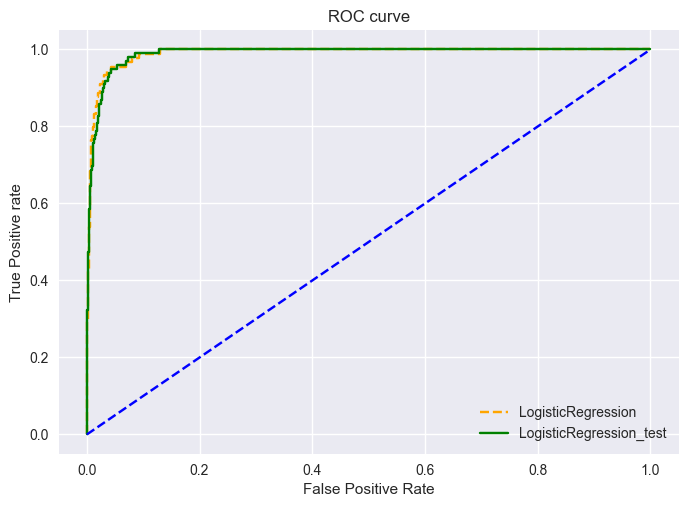

In [76]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='LogisticRegression_test')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Submission file 

In [77]:
# Generate predictions for the test data
test_predictions = model1.predict_proba(df_test_cleaned.drop(["player_id"], axis=1))[:, 1]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    "player_id": df_test_cleaned["player_id"],
    "drafted": test_predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission.csv", index=False)

/Users/yasamanmohammadi/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-1-beoJtoo6-py3.10/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
